## Multi Armed Bandit

In this demo, we would walk through the process of interacting with a Multi Armed Bandit environment in OpenAI Gym. You can select one amongst the many Bandit environments listed __[here.](https://github.com/JKCooper2/gym-bandits)__

We will make a comparision between Random Selection method and a Greedy Selection method.



In [21]:
import gym
import numpy as np

In [22]:
import gym_bandits
from matplotlib import pyplot as plot

We are invoking an environment in which one of the bandits has a higher rewards and the other has a lesser reward. We could examine it by evaluating the reward after each step. 

In [23]:
env = gym.make("BanditTwoArmedHighLowFixed-v0")

Repeat the step process given below for a couple of times and find out which Agent has a bigger reward.

In [24]:
env.reset()
observation, reward, done, info = env.step(1)
print(observation,reward)

0 0


In [25]:
observation, reward, done, info = env.step(0)

In [26]:
print(observation,reward)

0 1


An environments action space in Gym determines the possible actions our Agent can take.

In [27]:
env.action_space

Discrete(2)

In [28]:
env.observation_space

Discrete(1)

You can modify these numbers and repeat the tests to observe the impact between different approaches.

In [29]:
tot_episodes=200
tot_steps =100

tot_arms = env.action_space.n
print(tot_arms)


2


Lets make our Agent choose an action by random without considering the rewards it received in the past and plot the number of times it has picked each action.

In [30]:
average_value_function = np.zeros(tot_arms)
cumulated_reward_list = list()
average_value_function = np.zeros(tot_arms)
for episode in range(tot_episodes):
    cumulated_reward = 0
    reward_counter_array = np.zeros(tot_arms)
    action_counter_array = np.full(tot_arms, 1.0e-5)
    for step in range(tot_steps):
        action = np.random.randint(low=0, high=tot_arms)
        #print(action)
        observation,reward,done,info = env.step(action)
        reward_counter_array[action] += reward
        action_counter_array[action] += 1
        cumulated_reward += reward
    cumulated_reward_list.append(cumulated_reward)
    value_function = np.true_divide(reward_counter_array, action_counter_array)
    average_value_function += value_function

    


Let us find the average reward the Agent has collected.

In [31]:
print(np.mean(cumulated_reward_list))
print(action_counter_array)

49.85
[48.00001 52.00001]


Text(0, 0.5, 'Count')

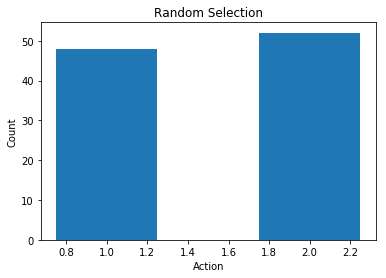

In [32]:

plot.title("Random Selection")
plot.bar([1,2],action_counter_array,width =0.5)
plot.xlabel('Action')
plot.ylabel('Count')

Let us make our Agent choose a Greedy action by picking the arm with higher reward estimate so far.

In [33]:
def return_greedy_action(reward_counter_array):
    amax = np.amax(reward_counter_array)
    indices = np.where(reward_counter_array == amax)[0]
    action = np.random.choice(indices)
    return action


In [34]:
average_value_function = np.zeros(tot_arms)
cumulated_reward_list = list()


for episode in range(tot_episodes):
    cumulated_reward = 0
    reward_counter_array = np.zeros(tot_arms)
    action_counter_array = np.full(tot_arms, 1.0e-5)
    for step in range(tot_steps):
        action = return_greedy_action(reward_counter_array)
        observation,reward,done,info = env.step(action)
        reward_counter_array[action] += reward
        action_counter_array[action] += 1
        cumulated_reward += reward
    cumulated_reward_list.append(cumulated_reward)
    value_function = np.true_divide(reward_counter_array, action_counter_array)
    average_value_function += value_function

In [35]:
print(np.mean(cumulated_reward_list))

70.83


Text(0, 0.5, 'Count')

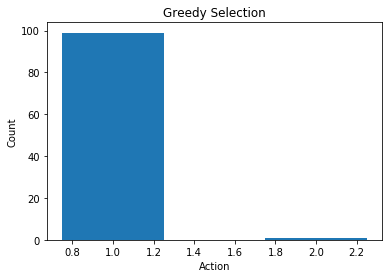

In [36]:



plot.title("Greedy Selection")
plot.bar([1,2],action_counter_array,width =0.5)
plot.xlabel('Action')
plot.ylabel('Count')

In [37]:
print(average_value_function/tot_episodes)

[0.6837992  0.02965121]


Let us find the average reward the Agent has collected.

In [38]:
print(np.mean(cumulated_reward_list))

70.83
